<a href="https://colab.research.google.com/github/Aya-shawky/Device-Classification-using-Python-Springboot-Mysql/blob/master/Devices_Price_Classification_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import the metrics class
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Read Data

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/datasets/train.csv")
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [5]:
df_train[df_train['four_g'].isnull()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,...,747.0,826.0,506.0,10.0,0.0,11,1,1,1,0
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,...,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0,3
261,728,0,2.7,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,1.0,12,1,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,...,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1,3
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,481.0,749.0,2261.0,7.0,6.0,16,1,1,1,1


In [6]:
df_train.shape

(2000, 21)

In [7]:
df_test = pd.read_csv("/content/drive/MyDrive/datasets/test.csv")
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
df_test.shape

(1000, 21)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
df_train = df_train.dropna()

In [13]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
df_train.duplicated().sum()

0

<Axes: >

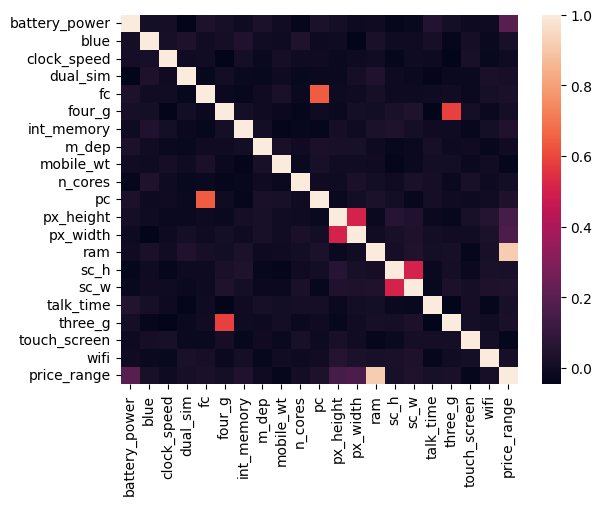

In [15]:
sns.heatmap(df_train.corr())

***feature engineering:***
- 4g , 3g ---> can we create new feature? ex: 0,1,2
- fc and pc
- px_width, px_hight
- sc_w , sc_hight

***Insight***
- high correlation between price and [ram , px_width, px_hight, battery power]

In [16]:
#sns.pairplot(df_train, corner=True)

In [17]:
column_names = df_train.columns

0 battery_power
1 blue
2 clock_speed
3 dual_sim
4 fc
5 four_g
6 int_memory
7 m_dep
8 mobile_wt
9 n_cores
10 pc
11 px_height
12 px_width
13 ram
14 sc_h
15 sc_w
16 talk_time
17 three_g
18 touch_screen
19 wifi
20 price_range


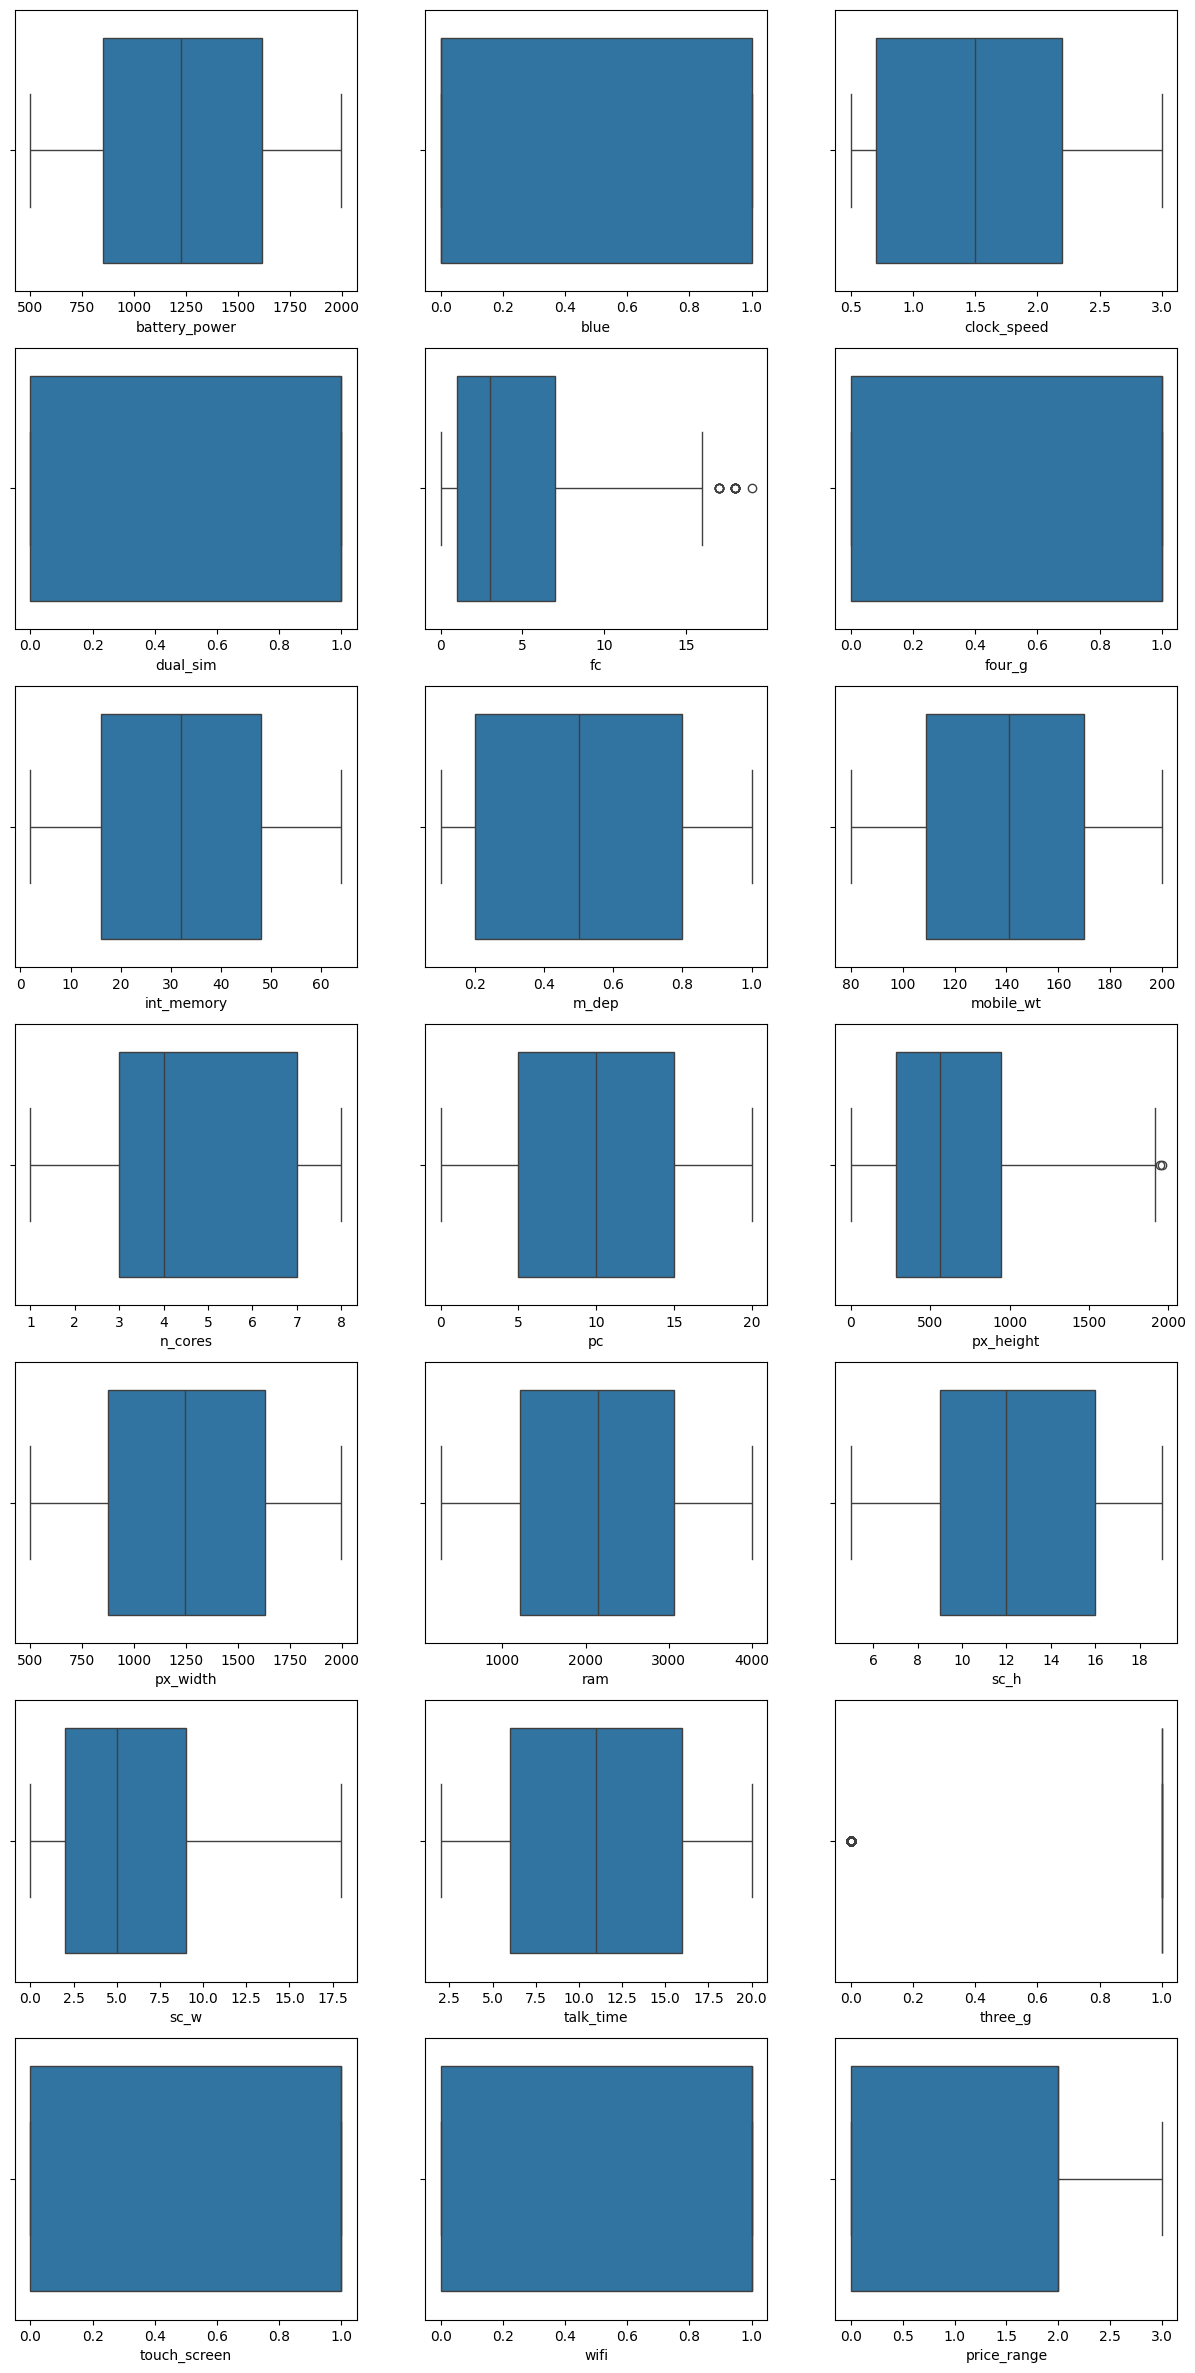

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,30))
for i, col in enumerate(column_names):
  print(i , col)
  plt.subplot(7,  3, i+1)
  sns.boxplot(x= df_train[col])



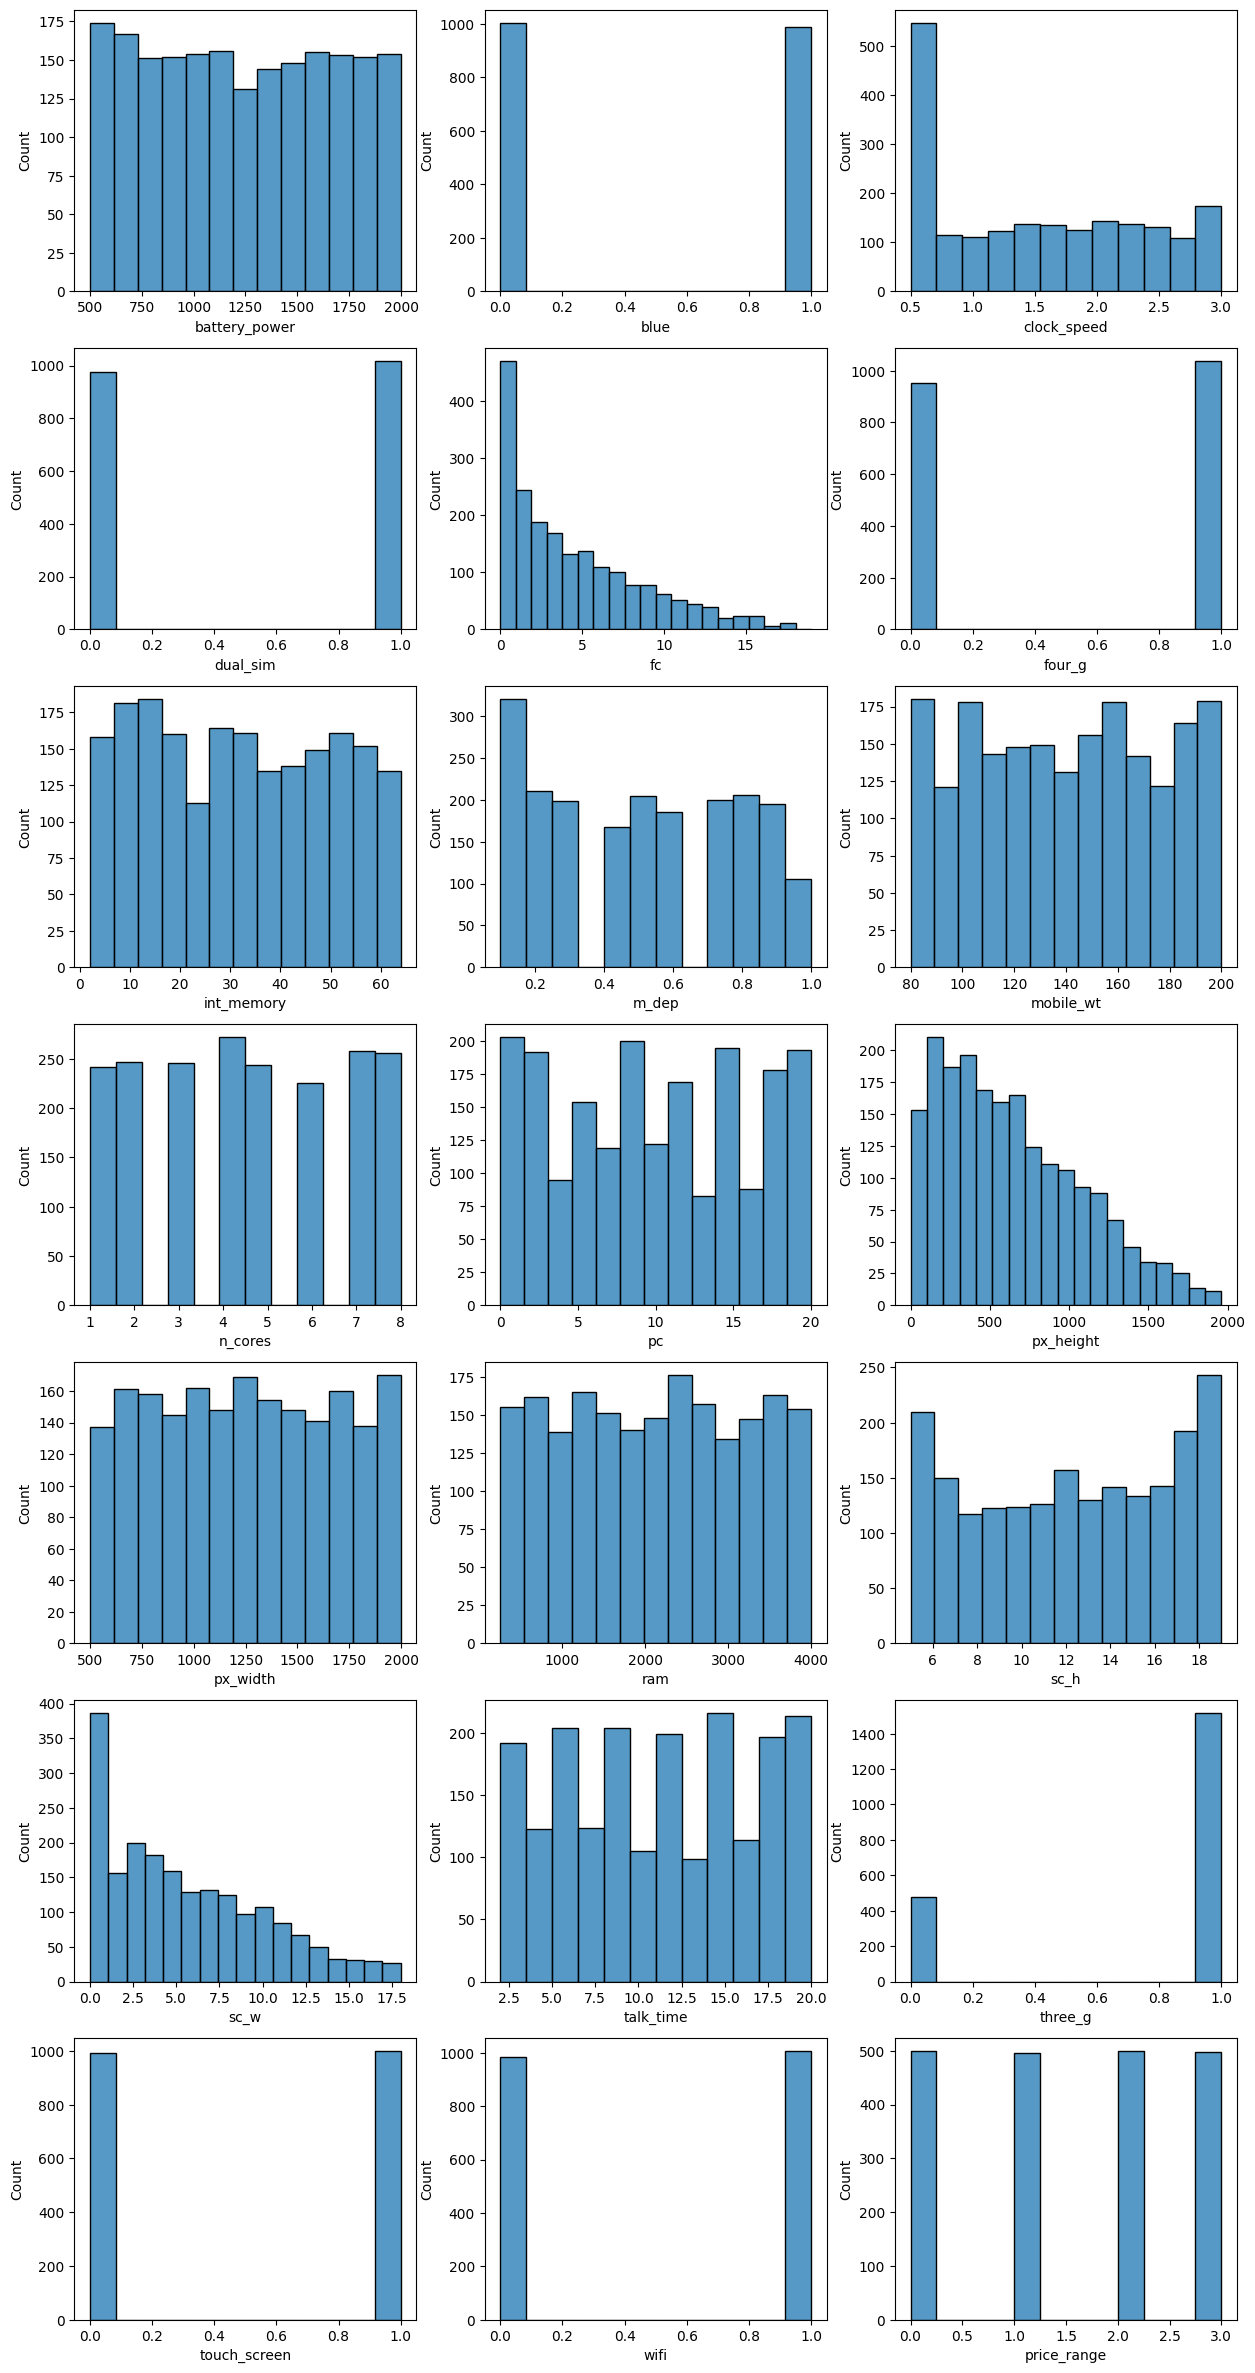

In [19]:
plt.figure(figsize = (15,30))
for i, col in enumerate(column_names):
  plt.subplot(7,  3, i+1)
  sns.histplot(x= df_train[col])

***Insights***
- Target is a balanced
- skweed distribuion (sc_w , px_hight, fc)
- px_hight, fc has outliers

***Inquire***
- can screan width = 0? or this is equal nan
- can pixel resolution hight start from 0 - 1 - 2 --- 2000?
- can camera megapixels = 0?
- هل حصل تبديل بين  sc_w , sc_h

**Thoughts about algorithm selection :**

**Data has**
--
- almost no outlier (px_hight, fc)
- skwead distribution so be careful when you use algo that aassume normality: like logistic or svm I have to take log

But also has **nonlinear relationships**
--
between target and feature except (ram) so

- we have to use polynomial or feature engineering as normalization
- Or We may choose descion tree, random forest , nn, gradient boosting


**Their is multi-colinearity**
--
Feature engineering like
- screen_area from sc_h * sc_w
- pixel_count from px_height * px_width

or Use lasso / Ridge



**Data is balanced**
--
no need for resampling or use gradientboost



**Data maybe small**
--
2000 example only, but 21 feature high dimention so it may cause overfitting
- feature selection
- feature importance
- feature engineering
- pca

## Data Spliting

In [20]:
X = df_train.drop( ["price_range"] , axis = 1)
y =df_train["price_range"]
X.shape , y.shape

((1991, 20), (1991,))

In [21]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(1592, 20)

***Trails:***
- Trail 1 -- Base Model -- no preprocess

# SVM

In [23]:
# copy of datasets
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

# numerical features
num_cols = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', ]

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_normalized[[i]])

    # transform the training data column
    X_train_normalized[i] = scale.transform(X_train_normalized[[i]])

    # transform the testing data column
    X_test_normalized[i] = scale.transform(X_test_normalized[[i]])

In [24]:
# SVM
svc = SVC(kernel = 'rbf', probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.5, 0.01, 1, 10,  20, 30, 50]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train_normalized, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.5, 0.01, 1, 10, 20, 30, 50],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
# best_parameter
grid_search.best_params_

no difference between 50 - 30

In [ ]:
svc = SVC(C=30, gamma = 0.001, kernel = 'rbf', probability=True)
svc.fit(X_train_normalized, y_train)

In [ ]:
print(accuracy_score(y_train, svc.predict(X_train_normalized)))
print(accuracy_score(y_test, svc.predict(X_test_normalized)))

In [ ]:
y_pred = svc.predict(X_test_normalized)
cnf_matrix = confusion_matrix(y_test, y_pred)
# import required modules
class_names=[0,1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
!pip install joblib

In [30]:
import joblib
filename = 'device_svm_model.pkl'
joblib.dump(model, filename)

NameError: name 'model' is not defined

# Neural Network

In [ ]:
df_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', ]

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
X_train_stand.describe()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(20,), activation='relu'))
model.add(Dense(8,  kernel_regularizer=l2(0.08), activation='relu'))
model.add(Dense(4, activation='softmax'))

# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# fit the keras model on the dataset
history = model.fit(X_train_stand, y_train, epochs=100, batch_size=32)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test_stand, y_test)
print('Accuracy: %.2f' % (accuracy*100))


In [ ]:
# make probability predictions with the model
predictions = model.predict(X_test_stand)
pred = [prob.argmax() for prob in predictions]

In [ ]:
for i in range(10):
 print(pred[i], y_test.iloc[i], pred[i] == y_test.iloc[i])

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('device_keras_model.h5')

The Best Model Was a very simply 2 layers NN that can create relations between features --> 94
--

# Other Models

### Desision Tree

-ve of dt:

Assume Feature Independence --> so It needs feature engineering

Assume equal importance for all features unless feature scaling or weighting is applied

capture noise in the data

Small datasets may lead to overfitting



In [31]:
from sklearn import tree
import graphviz

In [32]:

destree = tree.DecisionTreeClassifier(max_depth=4, criterion='gini',
                               random_state=0) #entropy
destree.fit(X_train, y_train)
#feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']



DecisionTreeClassifier(max_depth=4, random_state=0)

In [33]:
y_pred = destree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8145363408521303


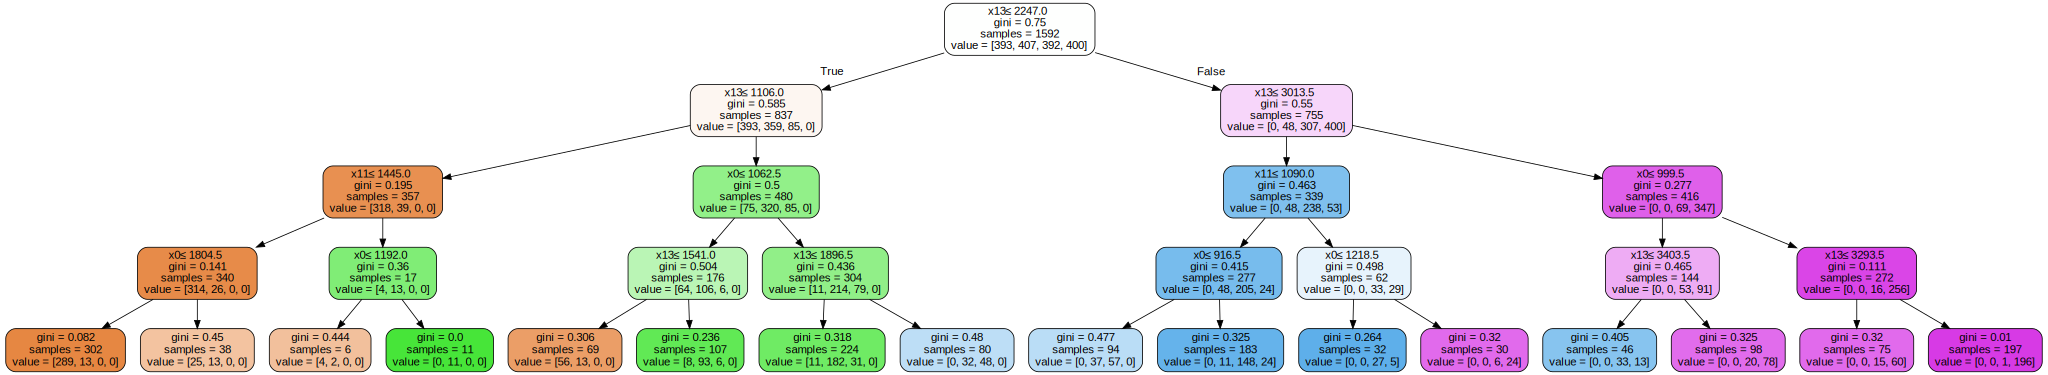

In [34]:
dot_data = tree.export_graphviz(destree, out_file=None,
                      #feature_names=feature_names,
                      #class_names=names,
                                max_depth=5,
                      filled=True, rounded=True,
                      special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)

### Random Forest

In [35]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8922305764411027


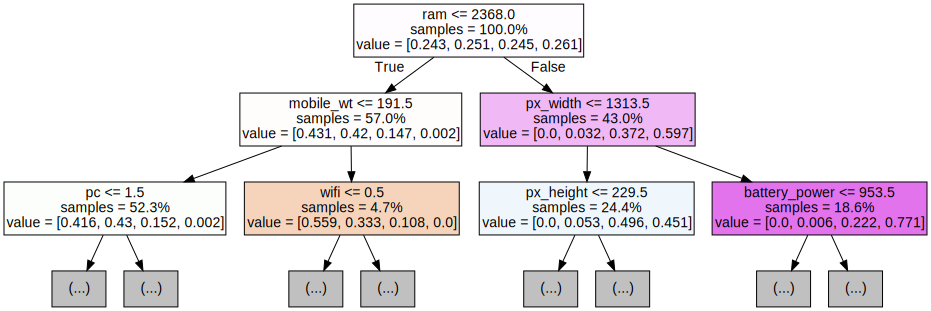

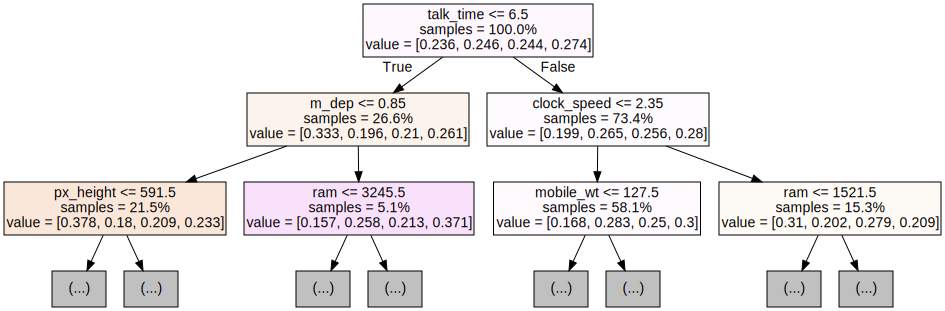

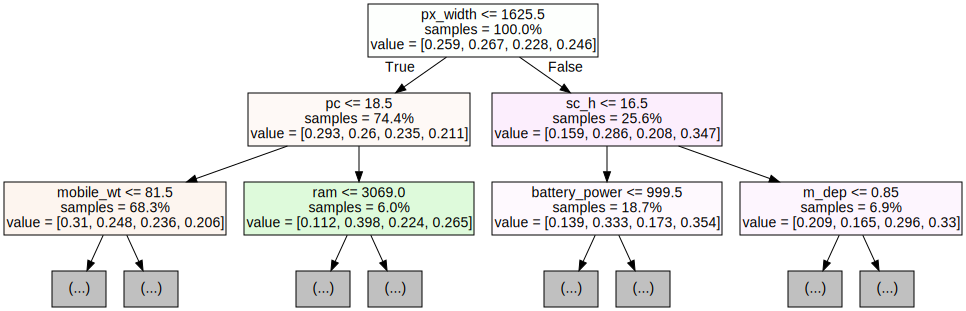

In [38]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [39]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a7227312a40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a7227313040>})

In [40]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 336}


Accuracy: 0.8721804511278195


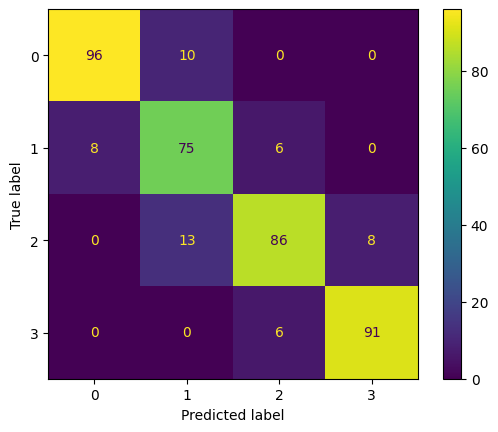

In [41]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Logistic

polynomial

In [42]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

# numerical features
num_cols = ['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', ]

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_normalized[[i]])

    # transform the training data column
    X_train_normalized[i] = scale.transform(X_train_normalized[[i]])

    # transform the testing data column
    X_test_normalized[i] = scale.transform(X_test_normalized[[i]])

In [43]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [44]:
y_pred = logreg.predict(X_test)

In [45]:
print(accuracy_score(y_train, logreg.predict(X_train_normalized)))
print(accuracy_score(y_test, logreg.predict(X_test_normalized)))

0.28015075376884424
0.2781954887218045


Text(0.5, 427.9555555555555, 'Predicted label')

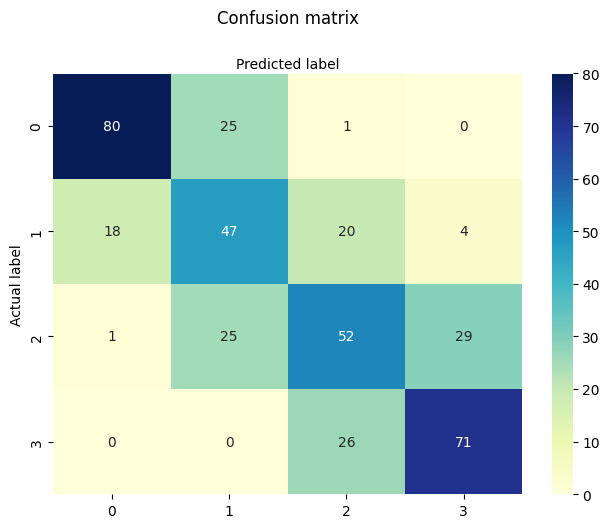

In [46]:
cnf_matrix = confusion_matrix(y_test, y_pred)
# import required modules
class_names=[0,1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       106
           1       0.48      0.53      0.51        89
           2       0.53      0.49      0.50       107
           3       0.68      0.73      0.71        97

    accuracy                           0.63       399
   macro avg       0.63      0.63      0.62       399
weighted avg       0.63      0.63      0.63       399

